# Monte Carlo Stock Portfolio Simulation

Stocks used will be from my own portfolio

## Imports

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import plotly_express as px
from pandas import Series

## Import Stock Data

In [16]:
def get_data(stock, start, end):
    stockData = pdr.get_data_yahoo(stock, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stockList = ['SQ','SNAP','MSFT','CHPT','PLUG','BB','TSLA']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stockList, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

## Monte Carlo Sim

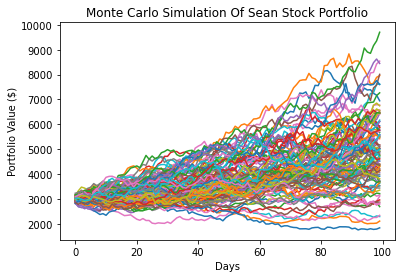

In [36]:
monte_sims = 100
T = 100

meanMatrix = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanMatrix = meanMatrix.T

portfolio_sims = np.full(shape=(T, monte_sims), fill_value=0.0)

initialPortfolio = 3000

for m in range(0,monte_sims):
    Z = np.random.normal(size=(T,len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanMatrix + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio #Evaluating the portfolio of each day and taking a cummulative product of daily returns

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation Of Sean Stock Portfolio')
plt.show()

fig2 = px.line(portfolio_sims)
fig2.update_layout(
    title="Sean Monte Carlo Simulation Portfolio",
    xaxis_title="Days",
    yaxis_title="Portfolio Value($)",)

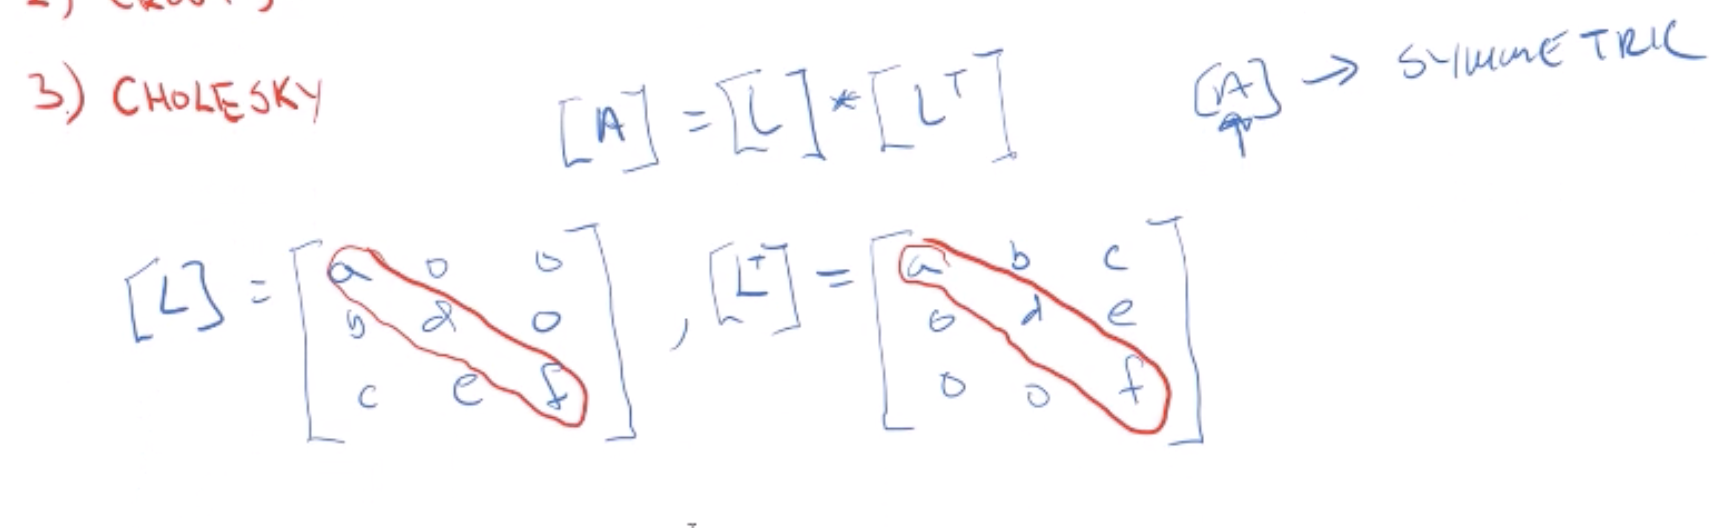

This is a cholesky decompositiom matrix
https://www.sciencedirect.com/topics/engineering/cholesky-decomposition

In [ ]:
# what does this do
# Input series of returns from pandas                            
# Output a percentile of a return distribution with confidence levels

In [61]:
def mcVaR(returns, alpha=5):
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError('Expected Pandas data series')
        


def mcCVaR(returns, alpha=5): #CVaR or expected shortfall to a given confidence level
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError('Expected Pandas data series')
        
portfolioResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portfolioResults,alpha=5)
CVaR = initialPortfolio - mcCVaR(portfolioResults,alpha=5)

print('Var ${}'.format(round(VaR,2)))
print('CVar ${}'.format(round(CVaR,2)))





Var $-4630.81
CVar $-1824.12
